

#SkyShield Simulation: Defense Strategy

### Situation:

One morning, radar systems in Bangladesh detected **10 enemy fighter jets** entering the country's airspace. The threat was real, and action had to be taken immediately.

But there was a big challenge — **limited missiles and limited fuel**.

---

### 🎯 Mission:

Stop as many enemy jets as possible using the **SkyShield system**, which makes smart decisions using **multiple algorithms**.

---

###  What We Had:

* **Missiles:** 9 types, each with different damage power and fuel cost
* **Maximum Fuel Available:** 20 units
* **Enemy Jets Detected:** 10
* **Radar Grid:** 6x6 map showing enemy locations

---

### 🧠 How SkyShield Responded:

1. **Detecting Enemies**
   Used **DFS (Depth-First Search)** to find all enemy positions on the radar grid.

2. **Planning the Fastest Route**
   Used **Dijkstra’s Algorithm** to calculate how much fuel would be needed to reach each enemy jet.

3. **Choosing the Best Missiles**
   Used the **Knapsack Algorithm** to select missiles that give the most damage without crossing the fuel limit.

4. **Attacking Enemies**
   The system launched missiles at the closest and most dangerous enemies first.

---





In [ ]:
import random
from collections import deque
import heapq
import time

# 6 x 6 grid
def create_grid():
    grid = []
    for i in range(6):
        row = []
        for j in range(6):
            row.append(0)
        grid.append(row)
    return grid

# generate enemy aircraft
def generate_aircraft(grid):
    num_aircraft = random.randint(1, 10)
    aircraft = 0
    while aircraft < num_aircraft:
        x = random.randint(0, 5)
        y = random.randint(0, 5)
        if grid[x][y] == 0:
            grid[x][y] = 1
            aircraft += 1
    return num_aircraft

# Apply DFS
def dfs(grid, start_x, start_y):
    visited = []
    for i in range(6):
        visited.append([False] * 6)

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    stack = [(start_x, start_y)]
    visited[start_x][start_y] = True
    aircraft_detected = []

    while stack:
        x, y = stack.pop()
        if grid[x][y] == 1:
            aircraft_detected.append((x, y))

        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < 6 and 0 <= new_y < 6 and not visited[new_x][new_y]:
                visited[new_x][new_y] = True
                stack.append((new_x, new_y))

    return aircraft_detected

# Dijkstra’s Algorithm
def dijkstra(grid, start_x, start_y):
    distances = [[float('inf')] * 6 for _ in range(6)]
    distances[start_x][start_y] = 0
    pq = [(0, start_x, start_y)]
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while pq:
        current_dist, x, y = heapq.heappop(pq)
        if current_dist > distances[x][y]:
            continue
        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < 6 and 0 <= new_y < 6:
                new_dist = current_dist + 1
                if new_dist < distances[new_x][new_y]:
                    distances[new_x][new_y] = new_dist
                    heapq.heappush(pq, (new_dist, new_x, new_y))

    return distances


def find_interception_paths(grid, start_x, start_y, detected_aircraft):
    distances = dijkstra(grid, start_x, start_y)
    interception_paths = []
    for aircraft in detected_aircraft:
        x, y = aircraft
        interception_paths.append((x, y, distances[x][y]))

    return interception_paths


# Knapsack Algorithm
def knapsack_missile_selection(missiles, max_fuel):
    n = len(missiles)
    dp = []
    for i in range(n + 1):
       dp.append([0] * (max_fuel + 1))

    for i in range(1, n + 1): #n = missiles numbers
        for f in range(max_fuel + 1):
            if missiles[i - 1]["Fuel Cost"] <= f:
                dp[i][f] = max(dp[i - 1][f],
                               dp[i - 1][f - missiles[i - 1]["Fuel Cost"]] + missiles[i - 1]["Damage"])
            else:
                dp[i][f] = dp[i - 1][f]

    # selected missiles
    f = max_fuel
    selected_missiles = []
    for i in range(n, 0, -1):
        if dp[i][f] != dp[i - 1][f]:
            selected_missiles.append(missiles[i - 1])
            f -= missiles[i - 1]["Fuel Cost"]

    return selected_missiles

# Greedy
def execute_interception(interception_paths, selected_missiles):
    successful_interceptions = min(len(interception_paths), len(selected_missiles))
    if successful_interceptions == len(interception_paths):
        damage_report = "Very little damage to the city!"
    else:
        damage_report = "Some enemy aircraft got away! The city might be in danger."

    return successful_interceptions, damage_report



grid = create_grid()
num_aircraft = generate_aircraft(grid)

# Available Missiles
missiles = [
    {"Damage": 50, "Fuel Cost": 3, "Weight": "10kg"},
    {"Damage": 60, "Fuel Cost": 4, "Weight": "12kg"},
    {"Damage": 70, "Fuel Cost": 5, "Weight": "14kg"},
    {"Damage": 30, "Fuel Cost": 2, "Weight": "8kg"},
    {"Damage": 90, "Fuel Cost": 6, "Weight": "18kg"},
    {"Damage": 100, "Fuel Cost": 7, "Weight": "20kg"},
    {"Damage": 40, "Fuel Cost": 2, "Weight": "9kg"},
   {"Damage": 85, "Fuel Cost": 5, "Weight": "16kg"},
    {"Damage": 75, "Fuel Cost": 4, "Weight": "13kg"}
]
print("\nAvailable Missiles of Bangladesh:")

for missile in missiles:
    print(f"Missile with Damage: {missile['Damage']}, Fuel Cost: {missile['Fuel Cost']}, Weight: {missile['Weight']}")

max_fuel = 20  # Fuel capacity
print(f"Maximum range (Fuel capacity): {max_fuel}\n")

print("Number of enemy Fighter Aircraft detected:", num_aircraft)


print("Grid Representation:")
for row in grid:
    print(row)

#Start DFS
start_time_dfs = time.time()
aircraft_detected = dfs(grid, 0, 0)
end_time_dfs = time.time()
print("Fighter Aircraft detected at positions:", aircraft_detected)


# Dijkstra's Algorithm
launch_x, launch_y = 5, 5

start_time_dijkstra = time.time()
interception_paths = find_interception_paths(grid, launch_x, launch_y, aircraft_detected)
end_time_dijkstra = time.time()

print("\nInterception Paths:")
for target_x, target_y, distance in interception_paths:
    print(f"Intercept Fighter Aircraft at ({target_x}, {target_y}) with distance: {distance}")

# 0/1 knapsack
start_time_knapsack = time.time()
selected_missiles = knapsack_missile_selection(missiles, max_fuel)
end_time_knapsack = time.time()
print("\nSelected Missiles for Interception:")
for missile in selected_missiles:
    print(f"Missile with Damage: {missile['Damage']}, Fuel Cost: {missile['Fuel Cost']}, Weight: {missile['Weight']}")

# Greedy Approch
start_time_execution = time.time()
successful_interceptions, damage_report = execute_interception(interception_paths, selected_missiles)
end_time_execution = time.time()
print(f"\nIntercepted {successful_interceptions} out of {len(interception_paths)} Enemy Aircraft. {damage_report}")

# Execution Time
print("\nNote:  ")
print(f"DFS Execution Time: {end_time_dfs - start_time_dfs} seconds")
print(f"Dijkstra's Algorithm Execution Time: {end_time_dijkstra - start_time_dijkstra} seconds")
print(f"Knapsack Algorithm Execution Time: {end_time_knapsack - start_time_knapsack} seconds")
print(f"Interception Execution(Greedy) Time: {end_time_execution - start_time_execution} seconds")



Available Missiles of Bangladesh:
Missile with Damage: 50, Fuel Cost: 3, Weight: 10kg
Missile with Damage: 60, Fuel Cost: 4, Weight: 12kg
Missile with Damage: 70, Fuel Cost: 5, Weight: 14kg
Missile with Damage: 30, Fuel Cost: 2, Weight: 8kg
Missile with Damage: 90, Fuel Cost: 6, Weight: 18kg
Missile with Damage: 100, Fuel Cost: 7, Weight: 20kg
Missile with Damage: 40, Fuel Cost: 2, Weight: 9kg
Missile with Damage: 85, Fuel Cost: 5, Weight: 16kg
Missile with Damage: 75, Fuel Cost: 4, Weight: 13kg
Maximum range (Fuel capacity): 20

Number of enemy Fighter Aircraft detected: 10
Grid Representation:
[1, 1, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1]
Fighter Aircraft detected at positions: [(0, 0), (0, 1), (2, 4), (2, 2), (4, 1), (5, 5), (3, 1), (3, 5), (1, 1), (1, 0)]

Interception Paths:
Intercept Fighter Aircraft at (0, 0) with distance: 10
Intercept Fighter Aircraft at (0, 1) with distance: 9
Intercept Fighter Aircraft at (

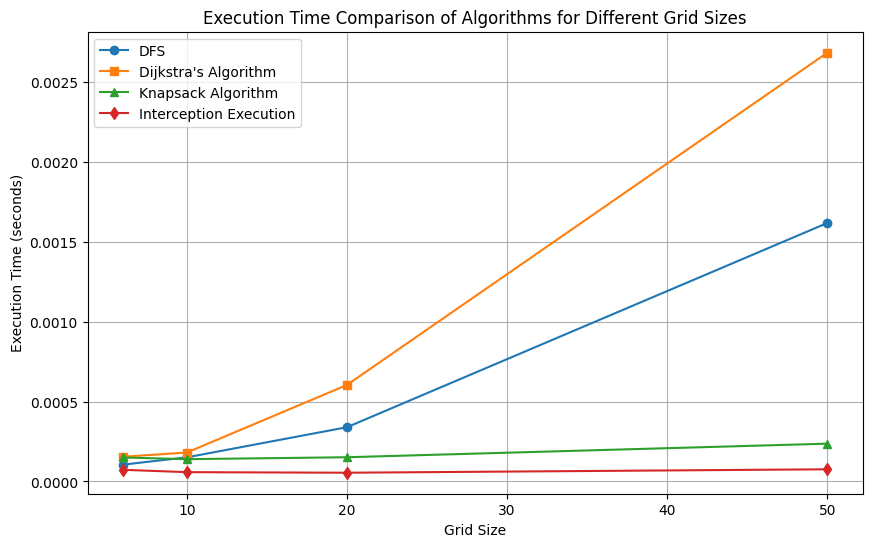

In [ ]:
import matplotlib.pyplot as plt


grid_sizes = [6, 10, 20, 50]


dfs_times = [0.00010514259338378906, 0.00015091896057128906, 0.00033926963806152344, 0.0016160011291503906]
dijkstra_times = [0.00015473365783691406, 0.00018095970153808594, 0.0006034374237060547, 0.002680540084838867]
knapsack_times = [0.00015020370483398438, 0.00013947486877441406, 0.00015163421630859375, 0.00023651123046875]
#interception_times = [7.319450378417969e-05, 5.841255187988281e-05, 5.4836273193359375e-05, 7.62939453125e-05]


plt.figure(figsize=(10, 6))
plt.plot(grid_sizes, dfs_times, marker='o', linestyle='-', label='DFS')
plt.plot(grid_sizes, dijkstra_times, marker='s', linestyle='-', label="Dijkstra's Algorithm")
plt.plot(grid_sizes, knapsack_times, marker='^', linestyle='-', label='Knapsack Algorithm')
plt.plot(grid_sizes, interception_times, marker='d', linestyle='-', label='Interception Execution')


plt.xlabel('Grid Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison of Algorithms for Different Grid Sizes')
plt.legend()
plt.grid()

plt.show()

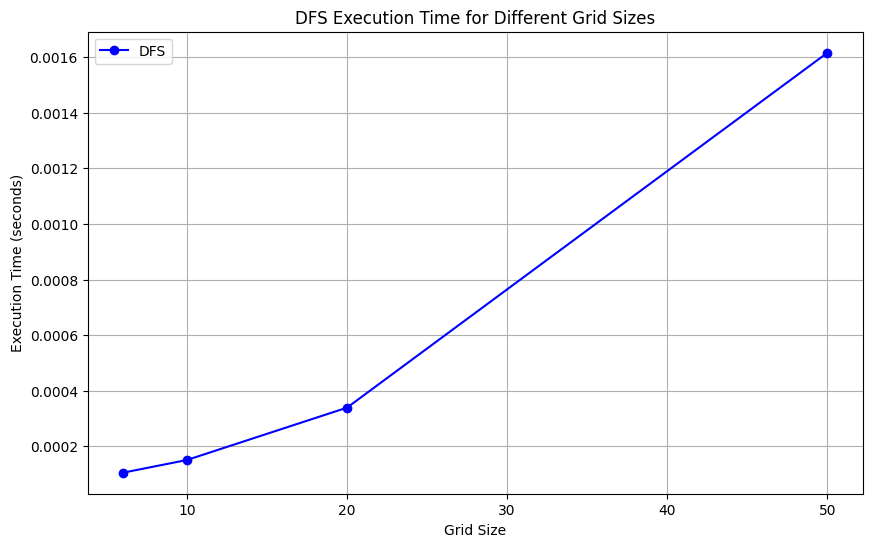

In [ ]:
import matplotlib.pyplot as plt

# Grid sizes
grid_sizes = [6, 10, 20, 50]

# Execution times for DFS (in seconds)
dfs_times = [0.00010514259338378906, 0.00015091896057128906, 0.00033926963806152344, 0.0016160011291503906]

# Plotting DFS
plt.figure(figsize=(10, 6))
plt.plot(grid_sizes, dfs_times, marker='o', linestyle='-', color='b', label='DFS')

# Labels and title
plt.xlabel('Grid Size')
plt.ylabel('Execution Time (seconds)')
plt.title('DFS Execution Time for Different Grid Sizes')
plt.legend()
plt.grid()

# Show plot
plt.show()


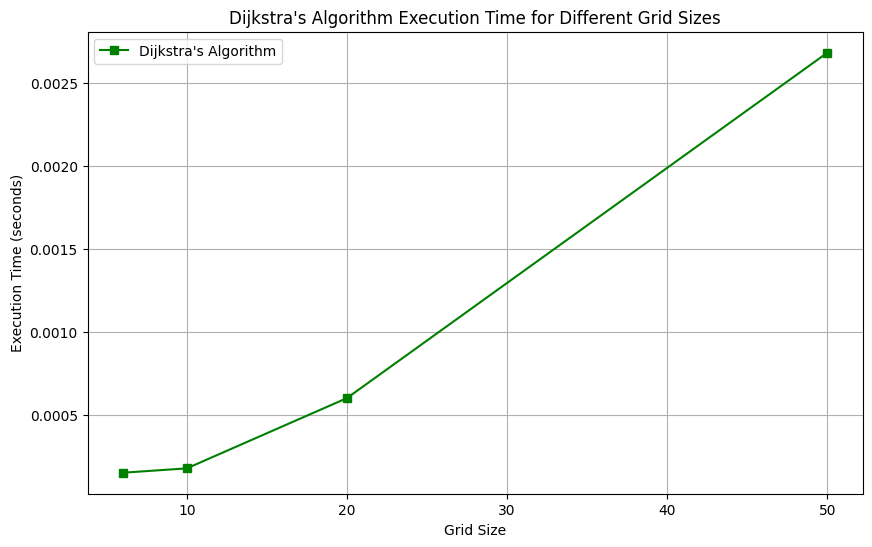

In [ ]:
import matplotlib.pyplot as plt

# Grid sizes
grid_sizes = [6, 10, 20, 50]

# Execution times for Dijkstra's Algorithm (in seconds)
dijkstra_times = [0.00015473365783691406, 0.00018095970153808594, 0.0006034374237060547, 0.002680540084838867]

# Plotting Dijkstra's Algorithm times
plt.figure(figsize=(10, 6))
plt.plot(grid_sizes, dijkstra_times, marker='s', linestyle='-', color='g', label="Dijkstra's Algorithm")

# Labels and title
plt.xlabel('Grid Size')
plt.ylabel('Execution Time (seconds)')
plt.title("Dijkstra's Algorithm Execution Time for Different Grid Sizes")
plt.legend()
plt.grid()

# Show plot
plt.show()


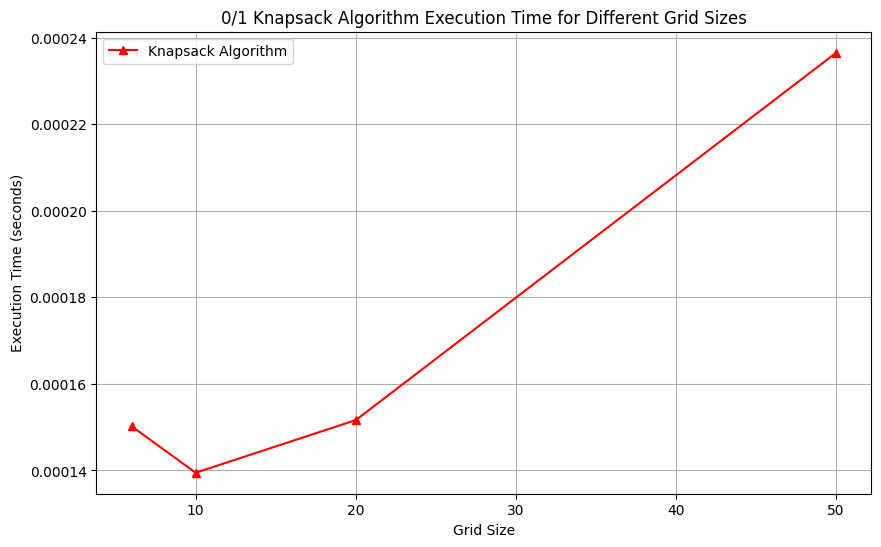

In [ ]:
import matplotlib.pyplot as plt

# Grid sizes
grid_sizes = [6, 10, 20, 50]

# Execution times for 0/1 Knapsack Algorithm (in seconds)
knapsack_times = [0.00015020370483398438, 0.00013947486877441406, 0.00015163421630859375, 0.00023651123046875]

# Plotting Knapsack times
plt.figure(figsize=(10, 6))
plt.plot(grid_sizes, knapsack_times, marker='^', linestyle='-', color='r', label='Knapsack Algorithm')

# Labels and title
plt.xlabel('Grid Size')
plt.ylabel('Execution Time (seconds)')
plt.title('0/1 Knapsack Algorithm Execution Time for Different Grid Sizes')
plt.legend()
plt.grid()

# Show plot
plt.show()


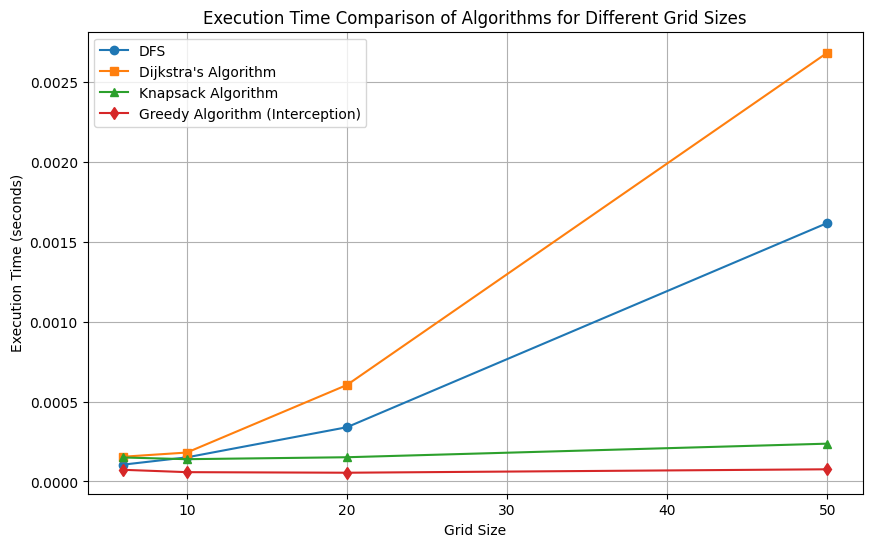

In [ ]:
import matplotlib.pyplot as plt

# Grid sizes
grid_sizes = [6, 10, 20, 50]

# Execution times (in seconds)
dfs_times = [0.00010514259338378906, 0.00015091896057128906, 0.00033926963806152344, 0.0016160011291503906]
dijkstra_times = [0.00015473365783691406, 0.00018095970153808594, 0.0006034374237060547, 0.002680540084838867]
knapsack_times = [0.00015020370483398438, 0.00013947486877441406, 0.00015163421630859375, 0.00023651123046875]
interception_times = [7.319450378417969e-05, 5.841255187988281e-05, 5.4836273193359375e-05, 7.62939453125e-05]

# Plotting
plt.figure(figsize=(10, 6))


plt.plot(grid_sizes, dfs_times, marker='o', linestyle='-', label='DFS')
plt.plot(grid_sizes, dijkstra_times, marker='s', linestyle='-', label="Dijkstra's Algorithm")
plt.plot(grid_sizes, knapsack_times, marker='^', linestyle='-', label='Knapsack Algorithm')
plt.plot(grid_sizes, interception_times, marker='d', linestyle='-', label='Greedy Algorithm (Interception)')

# Labels and title
plt.xlabel('Grid Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison of Algorithms for Different Grid Sizes')
plt.legend()
plt.grid()

# Show plot
plt.show()


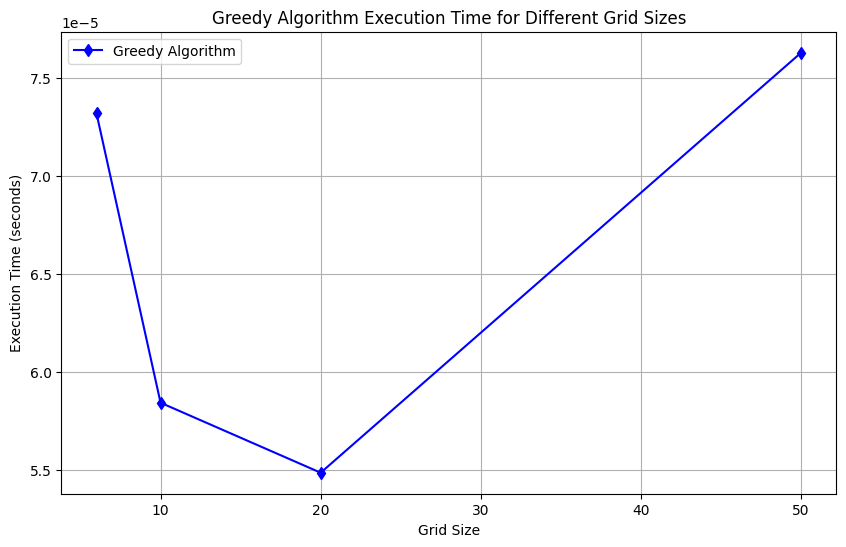

In [ ]:
import matplotlib.pyplot as plt

# Grid sizes
grid_sizes = [6, 10, 20, 50]

# Execution times for Greedy Algorithm (in seconds)
interception_times = [7.319450378417969e-05, 5.841255187988281e-05, 5.4836273193359375e-05, 7.62939453125e-05]

# Plotting Greedy Algorithm times
plt.figure(figsize=(10, 6))
plt.plot(grid_sizes, interception_times, marker='d', linestyle='-', color='b', label='Greedy Algorithm')

# Labels and title
plt.xlabel('Grid Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Greedy Algorithm Execution Time for Different Grid Sizes')
plt.legend()
plt.grid()

# Show plot
plt.show()
